[1.         0.504975   0.34850279 0.27618453 0.23704218 0.21403732
 0.19985788 0.19086042 0.18504545 0.18124263 0.17873643 0.17707636
 0.17597305 0.17523813 0.17474787 0.1744205  0.17420176 0.17405553
 0.17395774 0.17389234 0.1738486  0.17381933 0.17379975 0.17378666
 0.17377789 0.17377203 0.17376811 0.17376548 0.17376373 0.17376255
 0.17376176 0.17376124 0.17376089 0.17376065 0.17376049 0.17376039
 0.17376032 0.17376027 0.17376024 0.17376022 0.1737602  0.17376019
 0.17376019 0.17376018 0.17376018 0.17376018 0.17376018 0.17376018
 0.17376018 0.17376018 0.17376018 0.17376017 0.17376017 0.17376017
 0.17376017 0.17376017 0.17376017 0.17376017 0.17376017 0.17376017
 0.17376017 0.17376017 0.17376017 0.17376017 0.17376017 0.17376017
 0.17376017 0.17376017 0.17376017 0.17376017 0.17376017 0.17376017
 0.17376017 0.17376017 0.17376017 0.17376017 0.17376017 0.17376017
 0.17376017 0.17376017 0.17376017 0.17376017 0.17376017 0.17376017
 0.17376017 0.17376017 0.17376017 0.17376017 0.17376017 0.1737

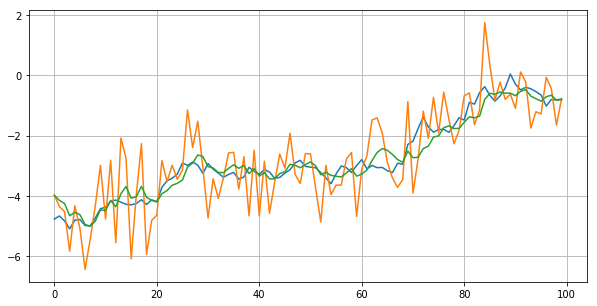

In [7]:
import numpy as np
import matplotlib.pyplot as plt

N = 100      # Число наблюд
dNoise = 1   # дисперсия шума
dSignal = 5  # диспес сигнала разброс от до скачет  перемещение координаты
r = 0.99     # коэффициент корреляц в модели движения от -1 до 1 это альфа 1-а = а
en = 0.2     # дисперсия sigma кси^2 В в модели движения 

x = np.zeros(N) #Буду координаты пока ноли
x[0] = np.random.normal(0, dSignal) #В первую координату запихиваем рандомную значен по гаус распрд
#x[0] = 2 #В первую координату запихиваем рандомную значен по гаус распрд
#print(x)
for i in range(1,N):
    #x[i]= r*2 + np.random.normal(0, en)# сигнал на основе предыдущ значен* 0.99  с разбросом в 0.1   
    x[i]= r*x[i-1] + np.random.normal(0, en)# сигнал на основе предыдущ значен* 0.99  с разбросом в 0.1  
#    print(0.99*x[i-1])
z = x + np.random.normal(0, dNoise, N)   # Тут к сигналу добавляем tot шум в 1 (входной сигнал)
#print(z)
# фильтрация сигнала 
xx = np.zeros(N) # Вектор для хранения оценок
P = np.zeros(N)  # вектор для хранения дисперсий ошибок оценивания
#print(P)
# Первое значение входящего сигнала и дисперсия всего сигнала
xx[0] = z[0] # первая оценка
P[0] = dNoise #дисперсия первой оценки

#print(xx[0])
for i in range(1, N):# Перебираем сигнал со второго значения
   # print(P)
   #Pe = 099^2 * 1 + 0.1^2 
    Pe = r*r * P[i-1] + en*en # 099^2 * 1(дисперсия шума) + 0.01(дисперсия сигнала)     Ошибка прогнозирования
    P[i]= (Pe*dNoise) / (Pe+dNoise) #  Дисперсия ошибки оценивание на текуш шаге
    xx[i] = r * xx[i-1] + P[i]/dNoise * (z[i] - r * xx[i-1]) #Оценка  99*перво знач сигнала + P/1 * второе знач - 099 * перв знач
    #print(P[i]-1)
    #print(P[i-1],' ' ,Pe)
    #Pe =   r*r*P[i-1]+P[i]/dNoise * (z[i]-r*xx[i-1])# Ошибка прогнозирования (0.99^2)*1 + 0/1 * (второе значен шума- 0.99*0) 
    #xx[i] = r*xx[i-1]+P[i]/dNoise *  (z[i]-r*xx[i-1]) # прогноз 0.99*перв знач xx + 0/1 *  * (второе значен шума- 0.99*0)
    #print(xx[i],' ', i)
print(P)
#fig, (ax1, ax2) = plt.subplots(nrows =2, ncols=1, figsize=(10,5))
fig, (ax1) = plt.subplots(nrows =1, ncols=1, figsize=(10,5))

ax1.plot(x) #Сформированный сигнал
ax1.plot(z) #Шум на основе сигнала 
ax1.plot(xx)
ax1.grid()
#print(x)
#print(z)
#print(xx)


3.9798933591825816


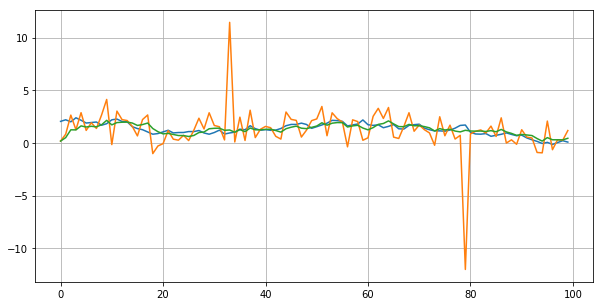

In [8]:
signal = np.array([2.0503528,2.2026423,2.0080721,2.39194073,2.15829979,1.89398986,
1.94212921,1.99026265,1.68504388,1.83083348,2.19966103,2.27253983,
2.04117503,2.01147038,1.54601115,1.36940332,1.26143199,1.04806504,
0.83348518,0.89551365,1.05314146,1.20774221,0.95695527,0.99408868,
0.99713966,1.08597859,1.08187016,1.18453715,0.95045398,0.83419114,
0.99416361,1.22110754,0.84951108,0.95194553,1.03112801,1.31127864,
1.25626467,1.63716678,1.36405658,1.2126097,1.26702993,1.20337427,
1.22488619,1.37524718,1.63837867,1.76233758,1.75988154,1.88433891,
1.75769345,1.39097742,1.54705914,1.71239614,1.87958601,2.14806638,
2.12349355,2.05236136,1.6184475,1.72041198,1.79830292,2.18713544,
1.73256165,1.67109676,1.72655474,1.44895481,1.57601375,1.74911932,
1.34742748,1.32406849,1.67137795,1.74039931,1.78231879,1.40991543,
1.25829609,1.14975253,1.15191043,1.11752939,1.22906872,1.40804962,
1.66713751,1.70633232,1.01174882,0.8563528,0.83724412,0.8937359,
0.63741681,0.73070852,0.82580928,0.95707928,0.81439515,0.69151463,
0.74555275,0.4796449,0.30349229,0.15399109,-0.04435674,0.06036494,
-0.13218566,0.04321835,0.2198656,0.08698904])
shum = np.array([1.81904544e-01,8.34564613e-01,2.64473574e+00,1.25959066e+00
,2.87508729e+00,1.19552542e+00,1.91838475e+00,1.37960733e+00
,2.65063493e+00,4.12893343e+00,-1.49563395e-01,3.02418494e+00
,2.21796949e+00,2.12900379e+00,1.57388473e+00,6.73204277e-01
,2.22321726e+00,2.65770358e+00,-1.00365247e+00,-2.82257871e-01
,-6.43938760e-02,1.17456204e+00,3.65888901e-01,2.67532667e-01
,7.26767606e-01,2.31353470e-01,1.20105132e+00,2.34990836e+00
,1.33168768e+00,2.86648890e+00,1.66277900e+00,1.54033880e+00
,2.91259380e-01,11.43887785e+00,9.99936829e-02,2.44996420e+00
,2.41388000e-01,3.10890991e+00,5.14187371e-01,1.30233719e+00
,1.57154811e+00,1.45022491e+00,6.32680447e-01,3.71819992e-01
,2.93925605e+00,2.24057920e+00,2.14551024e+00,5.65169002e-01
,1.22224572e+00,2.12242456e+00,2.28439691e+00,3.46259072e+00
,6.89921107e-01,2.86331993e+00,2.30524213e+00,1.99042829e+00
,-3.61381860e-01,2.19817987e+00,2.03133657e+00,2.59408020e-01
,4.95967008e-01,2.52977236e+00,3.28830060e+00,2.33075484e+00
,3.36695143e+00,5.57820139e-01,4.28495885e-01,1.56797836e+00
,2.87145003e+00,1.11610719e+00,1.70789668e+00,1.26407017e+00
,9.54077053e-01,-2.14608069e-01,2.48840379e+00,6.86619723e-01
,1.69230500e+00,3.76411878e-01,7.29264067e-01,-11.98700874e+00
,8.67752559e-01,1.11265478e+00,1.23951241e+00,9.42860736e-01
,1.60337566e+00,6.22405432e-01,2.38511310e+00,-2.19788444e-03
,3.01026043e-01,-1.18305906e-01,1.25831133e+00,5.59788336e-01
,4.76042093e-01,-8.96091281e-01,-9.33387882e-01,2.07978452e+00
,-6.34212638e-01,3.07389516e-01,2.62666667e-01,1.18254352e+00])
res = np.array([0.18190454,0.51058109,1.25101353,1.24432737,1.62139257,1.51749757,
1.58547589,1.53335502,1.72760644,2.14868434,1.72025738,1.93699572,
1.97047816,1.98200615,1.89433125,1.66570246,1.74906717,1.89277404,
1.3732831,1.07405241,0.86726182,0.91351139,0.8107873,0.70967806,
0.70678433,0.61832809,0.71447798,0.99275607,1.04344757,1.35160253,
1.39450565,1.40832385,1.20258561,1.23370767,1.02651959,1.26537637,
1.07699278,1.42116071,1.25182261,1.25025698,1.29575447,1.31188924,
1.18303044,1.0322997,1.35512351,1.49778388,1.59795764,1.40529714,
1.36187897,1.48277912,1.60981705,1.91845438,1.68913319,1.87920379,
1.93770556,1.93085657,1.51660332,1.6225034,1.68013655,1.41938856,
1.24720711,1.45976095,1.76542719,1.84907196,2.09754119,1.81266827,
1.55717725,1.54618803,1.76369057,1.63659405,1.63546142,1.55741558,
1.43971138,1.14036108,1.3651751,1.23598958,1.30506679,1.13292057,
1.0534205,1.20693718,1.1380282,1.12421647,1.13496159,1.09220461,
1.17200155,1.06682009,1.28707242,1.05241428,0.91315746,0.72638534,
0.81281121,0.76213014,0.70612241,0.42188721,0.18290858,0.51099881,
0.30778459,0.3051729,0.29526555,0.44699953])
fig, (ax1) = plt.subplots(nrows =1, ncols=1, figsize=(10,5))

ax1.plot(signal) #Сформированный сигнал
ax1.plot(shum) #Шум на основе сигнала 
ax1.plot(res)
ax1.grid()
# ДИСПЕРСИЯ  2,3764    STD 1.5415
m = sum(res) / len(shum) # сред знач мат ожид
varRes = sum([(xi - m)**2 for xi in shum]) / len(shum)# читая - сред / кол-во  
# фильтрация сигнала 
print(varRes)

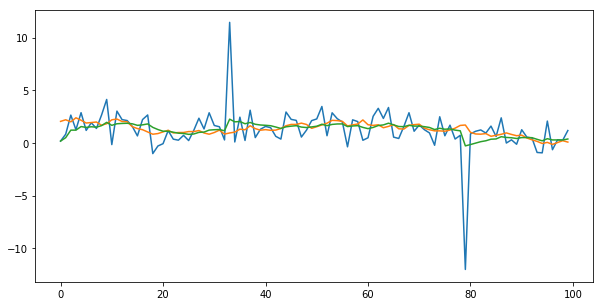

In [9]:
N = 100
stD= np.std(shum)
#print(stD)
# ДИСПЕРСИЯ  2,3764    STD 1.5415
m = sum(signal) / len(signal) # сред знач мат ожид
disper = sum([(xi - m)**2 for xi in signal]) / len(signal)# читая - сред / кол-во  

r = 0.99
# фильтрация сигнала 
xx = np.zeros(N) # Вектор для хранения оценок
P = np.zeros(N)  # вектор для хранения дисперсий ошибок оценивания
en = 0.07
#disper = 1
# Первое значение входящего сигнала и дисперсия всего сигнала
xx[0] = shum[0] # первая оценка

P[0] = disper #дисперсия первой оценки
#print(xx[0])
for i in range(1, N):# Перебираем сигнал со второго значения
    
    Pe = r**2 * P[i-1] + en**2 # 099^2 * 1(дисперсия шума) + 0.01     Ошибка прогнозирования
    P[i]= (Pe*disper) / (Pe+disper) #  Дисперсия ошибки оценивание на текуш шаге
    xx[i] = r * xx[i-1] + P[i]/disper * (shum[i] - r * xx[i-1]) #Оценка  99*перво знач сигнала + P/1 * второе знач - 099 * перв знач
    #print(z[i])
    
fig, (ax1) = plt.subplots(nrows =1, ncols=1, figsize=(10,5))
#aa = np.std(signal)

ax1.plot(shum) #Сформированный сигнал
ax1.plot(signal) #Шум на основе сигнала 
ax1.plot(xx)
#ax1.grid()    

300


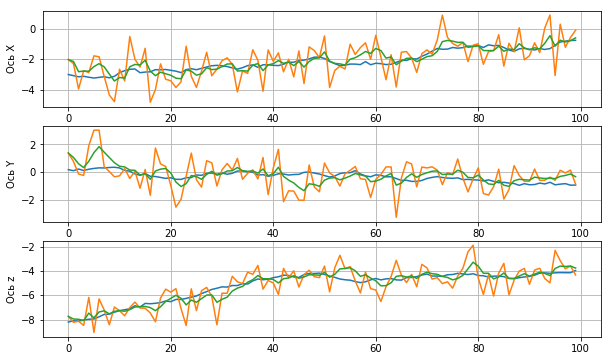

In [10]:
import numpy as np
import matplotlib.pyplot as plt

N = 100      # Число наблюд
dNoise = 1   # дисперсия шума
dSignal = 5  #диспес сигнала перемещение координаты
r = 0.99     # коэффициент корреляц в модели движения от -1 до 1 это альфа 1-а = а
en = 0.1     # дисперсия СВ в модели движения

M =3 # Размерность вектора координат полож объекта
R = np.array([[r,0,0],[0,r,0],[0,0,r]])#  matrix диогонально почему?

Vksi = np.eye(M)*en # диогонал матрица с дисперс по главной диогонали
V = np.eye(M)*dNoise # диогон матрица с дисперс ошибок наблюд
#print(Vksi)

x = np.zeros(N*M).reshape(N,M) # координаты перемещения забиты 000
x[:][0]=np.random.normal(0, dSignal, M)# формирование первой координаты

for i in range(1, N): # формирован коорд с первой + коререляцией
    x[:][i] = np.dot(R, x[:][i-1]) + np.random.normal(0, en, M)

z = x + np.random.normal(0, dNoise, size=(N,M)) # формирование наблюдений

# Фильтрация сигнала фильтр Калмана
xx = np.zeros(N*M).reshape(N,M)# вектор для хранения оценок
P = np.zeros(M*M).reshape(M,M)# вектор для хранения дисперсий ошибок оценивании
xx[:][0] = z[:][0] # первая оценка
P=V # дисперсия первой оценки

Vinv = np.linalg.inv(V)# вычисление обратной матрицы
for i in range(1, N):
    Pe = np.dot(np.dot(R, P), R.T) + Vksi #Дисперс ошибки прогноза (экстрополяц)
    P = np.dot(Pe, V) * np.linalg.inv(Pe + V) # дисперсия ошибки оценивания
    xe = np.dot(R, xx[:][i-1])# Прогноз
    xx[:][i] = xe + np.dot(np.dot(P, Vinv), (z[:][i]-xe)) # оценка прогноза

    # отображ результатов
fig, (axX, axY, axZ)= plt.subplots(nrows = 3, ncols = 1, figsize=(10,6))
#print(xx)
res = xx.reshape(M*N)
resX = x.reshape(M*N)
resZ = z.reshape(M*N)
print(len(resZ))
axX.plot(resX[0:N*M:M]); axX.plot(resZ[0:N*M:M]); axX.plot(res[0:N*M:M])
axY.plot(resX[1:N*M:M]); axY.plot(resZ[1:N*M:M]); axY.plot(res[1:N*M:M])
axZ.plot(resX[2:N*M:M]); axZ.plot(resZ[2:N*M:M]); axZ.plot(res[2:N*M:M])

axX.set_ylabel('Ось X'); axY.set_ylabel('Ось Y');axZ.set_ylabel('Ось z')
axX.grid(True);axY.grid(True);axZ.grid(1)

plt.show()
#print(V)


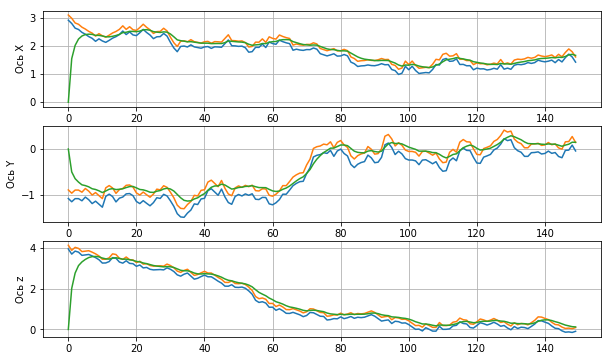

In [11]:
import numpy as np
import matplotlib.pyplot as plt

N = 150      # Число наблюд
dNoise = 1   # дисперсия шума
dSignal = 5# диспес сигнала перемещение координаты
r = 0.99     # коэффициент корреляц в модели движения от -1 до 1 это альфа 1-а = а
en = 0.1     # дисперсия СВ в модели движения

M =3 # Размерность вектора координат полож объекта
R = np.array([[r,0,0],[0,r,0],[0,0,r]])#  matrix диогонально почему? типа 0 означ что данные меж собой незавсят
V = np.eye(M)*dNoise # диогон матрица с дисперс ошибок наблюд  разброс сигнала сигнал
Vksi = np.eye(M)*en # создает диогонал матрицу с 1-ми на указзонной диогонали
#print(Vksi)
x = np.zeros(N*M).reshape(N,M) # координаты перемещения забиты 000

x[:][0]=np.random.normal(0, dSignal, M)# формирование первой координаты по X Y Z в диапозоне 5
#print(x)
for i in range(1, N): # формирован коорд с первой + коререляцией + нормал распредел с 0.1
    x[i] = np.dot(R, x[i-1]) + np.random.normal(0, en, M)
    #x[:][i] = np.dot(R, x[:][i-1]) + np.random.normal(0, en, M)

z = x + np.random.normal(0, dNoise) # формирование наблюдений
#z = x + np.random.normal(0, dNoise, size=(N,M)) # формирование наблюдений

# Фильтрация сигнала фильтр Калмана
xx = np.zeros(N*M).reshape(N,M)# вектор для хранения оценок
P = np.zeros(M*M).reshape(M,M)# вектор для хранения дисперсий ошибок оценивании

#xx[:][0] = z[:][0] # первая оценка
P=V # дисперсия первой оценки матрица

#print(P)
Vinv = np.linalg.inv(V)# вычисление обратной матрицы
D = np.linalg.inv(Pe + V) 
#print(Pe+V)
#print(P)
for i in range(1, N):#Скалярное произведение (R(матрица корел) * дисперс ошибок) на произведение транспониров R(корел)
    #Pe = np.dot(np.dot(R, P), R.T)  #Дисперс ошибки прогноза (экстрополяц)
    Pe = np.dot(np.dot(R, P), R.T) + Vksi #Дисперс ошибки прогноза (экстрополяц)
    #print(np.linalg.inv(Pe+V))
    P = np.dot(Pe, V) * np.linalg.inv(Pe + V) # дисперсия ошибки оценивания
    xe = np.dot(R, xx[:][i-1])# Прогноз
    xx[:][i] = xe + np.dot(np.dot(P, Vinv), (z[:][i]-xe)) # оценка прогноза
#print(xx)
fig, (axX, axY, axZ)= plt.subplots(nrows = 3, ncols = 1, figsize=(10,6))
#print(xx)
res = xx.reshape(M*N)
resX = x.reshape(M*N)
resZ = z.reshape(M*N)

axX.plot(resX[0:N*M:M]); axX.plot(resZ[0:N*M:M]); axX.plot(res[0:N*M:M])
axY.plot(resX[1:N*M:M]); axY.plot(resZ[1:N*M:M]); axY.plot(res[1:N*M:M])
axZ.plot(resX[2:N*M:M]); axZ.plot(resZ[2:N*M:M]); axZ.plot(res[2:N*M:M])

axX.set_ylabel('Ось X'); axY.set_ylabel('Ось Y');axZ.set_ylabel('Ось z')
axX.grid(True);axY.grid(True);axZ.grid(1)

plt.show()

In [12]:
a = np.array([[1,2],[1,1]])
b = np.array([[3,3],[3,3]])
c = np.array([[4,4],[4,4]])
x2 = np.dot(np.dot(a,c),b)
x


array([[ 2.92485066e+00, -1.06702017e+00,  3.96349076e+00],
       [ 2.80763863e+00, -1.13746433e+00,  3.71178502e+00],
       [ 2.64134243e+00, -1.07048652e+00,  3.85992981e+00],
       [ 2.59341971e+00, -1.07072723e+00,  3.80697647e+00],
       [ 2.49062872e+00, -1.11648938e+00,  3.64999653e+00],
       [ 2.42363265e+00, -1.03694615e+00,  3.67321234e+00],
       [ 2.34041830e+00, -1.09376659e+00,  3.69330865e+00],
       [ 2.27898938e+00, -1.17695969e+00,  3.62174147e+00],
       [ 2.17166097e+00, -1.12479959e+00,  3.53932484e+00],
       [ 2.26005903e+00, -1.18938006e+00,  3.43479656e+00],
       [ 2.18377957e+00, -1.25471748e+00,  3.27002020e+00],
       [ 2.13424610e+00, -1.02201940e+00,  3.27574211e+00],
       [ 2.20514637e+00, -9.73612924e-01,  3.34314319e+00],
       [ 2.28429719e+00, -1.02525789e+00,  3.53950233e+00],
       [ 2.33733346e+00, -1.14082409e+00,  3.50623608e+00],
       [ 2.41276359e+00, -1.06029537e+00,  3.32173364e+00],
       [ 2.53864732e+00, -1.03563072e+00

## Кальмана для 6 параметров xyz vx vy vz

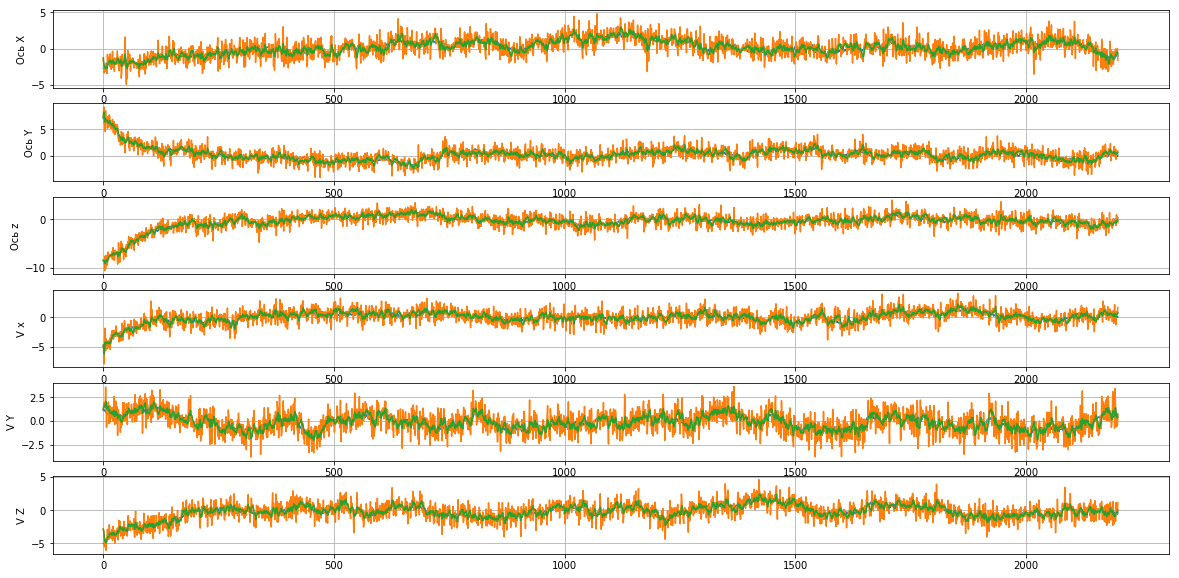

[[0.1 0.  0.  0.  0.  0. ]
 [0.  0.1 0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.  0.1]]


In [38]:
import numpy as np
import matplotlib.pyplot as plt

N = 2200      # Число наблюд
dNoise = 1   # дисперсия шума
dSignal = 5  # диспес сигнала перемещение координаты
r = 0.99     # коэффициент корреляц в модели движения от -1 до 1 это альфа 1-а = а
en = 0.1     # дисперсия СВ в модели движения

M =6 # Размерность вектора координат полож объекта
#R = np.array([[1,0,0,1,0,0],[0,1,0,0,1,0],[0,0,1,0,0,1], [0,0,0,r,0,0],[0,0,0,0,r,0],[0,0,0,0,0,r]])#  matrix диогонально почему?
R = np.array([[r,0,0,0,0,0],[0,r,0,0,0,0],[0,0,r,0,0,0], [0,0,0,r,0,0],[0,0,0,0,r,0],[0,0,0,0,0,r]])#болш похо на правд
Vksi = np.eye(M)*en # диогонал матрица с дисперс по главной диогонали
V = np.eye(M)*dNoise # диогон матрица с дисперс ошибок наблюд

x = np.zeros(N*M).reshape(N,M) # координаты перемещения забиты 000

x[:][0]=np.random.normal(0, dSignal, M)# формирование первой координаты
#print(x)
for i in range(1, N): # формирован коорд с первой + коререляцией
    x[:][i] = np.dot(R, x[:][i-1]) + np.random.normal(0, en, M)
#print(x)
z = x + np.random.normal(0, dNoise, size=(N,M)) # формирование наблюдений


# Фильтрация сигнала фильтр Калмана
xx = np.zeros(N*M).reshape(N,M)# вектор для хранения оценок
P = np.zeros(M*M).reshape(M,M)# вектор для хранения дисперсий ошибок оценивании
xx[:][0] = z[:][0] # первая оценка
P=V # дисперсия первой оценки
#print(P)
Vinv = np.linalg.inv(V)# вычисление обратной матрицы
for i in range(1, N):
    Pe = np.dot(np.dot(R, P), R.T) + Vksi #Дисперс ошибки прогноза (экстрополяц)
    P = np.dot(Pe, V) * np.linalg.inv(Pe + V) # дисперсия ошибки оценивания
    xe = np.dot(R, xx[:][i-1])# Прогноз
    xx[:][i] = xe + np.dot(np.dot(P, Vinv), (z[:][i]-xe)) # оценка прогноза

#print(P)
    # отображ результатов
fig, (axX, axY, axZ, axV, ayV, azV)= plt.subplots(nrows = 6, ncols = 1, figsize=(20,10))
#print(xx)
res = xx.reshape(M*N) # оценка
resX = x.reshape(M*N) # шум
resZ = z.reshape(M*N) # сигнал
#print(resZ[1:3*6:6])  # [столбец, до кол-во* матрицу, один элемент ]
#axZ.plot(resZ[0:N*M:M])
axX.plot(resX[0:N*M:M]); axX.plot(resZ[0:N*M:M]); axX.plot(res[0:N*M:M])
axY.plot(resX[1:N*M:M]); axY.plot(resZ[1:N*M:M]); axY.plot(res[1:N*M:M])
axZ.plot(resX[2:N*M:M]); axZ.plot(resZ[2:N*M:M]); axZ.plot(res[2:N*M:M])
axV.plot(resX[3:N*M:M]); axV.plot(resZ[3:N*M:M]); axV.plot(res[3:N*M:M])
ayV.plot(resX[4:N*M:M]); ayV.plot(resZ[4:N*M:M]); ayV.plot(res[4:N*M:M])
azV.plot(resX[5:N*M:M]); azV.plot(resZ[5:N*M:M]); azV.plot(res[5:N*M:M])

axX.set_ylabel('Ось X'); axY.set_ylabel('Ось Y');axZ.set_ylabel('Ось z')
axV.set_ylabel('V х'); ayV.set_ylabel('V Y');azV.set_ylabel('V Z')
axX.grid(True);axY.grid(True);axZ.grid(1);axV.grid(True);ayV.grid(True);azV.grid(1)

plt.show()
#print(V)
#print(R)
print(Vksi)